In [54]:
# BIBLIOTECAS
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DECLARA SIMBOLOS
x, y, C1, C2 = symbols('x y C1 C2')

# GALERKIN
y = C1*x*(2 - x) + C2*x*(1 - x)**2 + 1*x

# DERIVADAS DO POLINÔMIO
dy   = y.diff(x)
ddy  = y.diff(x,x)

# RESÍDUO
R = -ddy - y + x**2 
phi1 = y.diff(C1) 
phi2 = y.diff(C2)

# SISTEMA DE EQUAÇÕES
I1 = integrate(R*phi1, (x, 0, 1))
I2 = integrate(R*phi2, (x, 0, 1))
system = [I1, I2]
var = [C1, C2] 
sol = solve(system, var)
C1_ = sol[C1]
C2_ = sol[C2]

# EQUAÇÃO DA LINHA ELASTICA FINAL
y1 = y.subs([(C1,C1_), (C2,C2_)]).simplify()
dy1 = dy.subs([(C1,C1_), (C2,C2_)]).simplify()
ddy1 = ddy.subs([(C1,C1_), (C2,C2_)]).simplify()
R_g = -ddy1 - y1 + x**2 
display(R_g.simplify())

# VALIDA SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS
print("y(0) = 0: ", y1.subs(x,0).simplify() == 0)
print("dy(1) = 1: ", dy1.subs(x,1).simplify() == 1)

7*x**3/2153 + 2454*x**2/2153 - 2734*x/2153 + 602/2153

y(0) = 0:  True
dy(1) = 1:  True


In [3]:
# DECLARA SIMBOLOS
x, y, C1, C2 = symbols('x y C1 C2')

# COLOCAÇÃO POR PONTOS
y_ = C1*x*(2 - x) + C2*x*(1 - x)**2 + 1*x

# DERIVADAS DO POLINÔMIO
dy_   = y_.diff(x)
ddy_  = y_.diff(x,x)

# RESÍDUO
R = -ddy_ - y_ + x**2 

# SISTEMA DE EQUAÇÕES
R1 = R.subs(x, 1/5)
R2 = R.subs(x, 4/5)
system = [R1, R2]
var = [C1, C2] 
sol = solve(system, var)
C1_ = sol[C1]
C2_ = sol[C2]

# EQUAÇÃO DA LINHA ELASTICA FINAL
y2 = y_.subs([(C1,C1_), (C2,C2_)]).simplify()
dy2 = dy_.subs([(C1,C1_), (C2,C2_)]).simplify()
ddy2 = ddy_.subs([(C1,C1_), (C2,C2_)]).simplify()
R_c = -ddy2 - y2 + x**2 

# VALIDA SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS
print("y(0) = 0: ", y_.subs(x,0).simplify() == 0)
print("dy(1) = 1: ", dy_.subs(x,1).simplify() == 1)

y(0) = 0:  True
dy(1) = 1:  True


In [44]:
x = Symbol('x')
f = Function('f')(x)
ics = {f.subs(x,0): 0, f.diff(x).subs(x,1): 1}
display(ics)
ode = Eq(-f.diff(x,x) - f + x**2,0)
display(ode)
fsol = dsolve(ode, f, ics = ics)
fsol.simplify()

{f(0): 0, Subs(Derivative(f(x), x), x, 1): 1}

Eq(x**2 - f(x) - Derivative(f(x), (x, 2)), 0)

Eq(f(x), x**2 - sin(x)/cos(1) + 2*sin(x)*tan(1) + 2*cos(x) - 2)

In [49]:
f = x**2 - sin(x)/cos(1) + 2*sin(x)*tan(1) + 2*cos(x) - 2
R_exat = -f.diff(x,x) - f + x**2

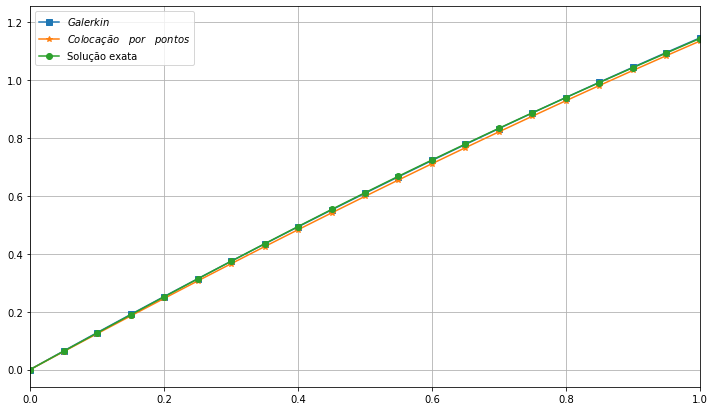

In [48]:
# PLOT 
fig, ax = plt.subplots(figsize = (12, 7))
x_range = np.arange(0.0, 1.1, 0.05)

x_2 = list()
y_1 = list()
y_2 = list()
y_3 = list()

for i in x_range:
    x_2.append(i)
    value2 = y1.subs([(x, i)])
    y_1.append(value2)
    
    value3 = y2.subs([(x, i)])
    y_2.append(value3)
    
    value4 = f.subs([(x, i)])
    y_3.append(value4)
    
plt.plot(x_2, y_1, '-s')
plt.plot(x_2, y_2, '-*')
plt.plot(x_2, y_3, '-o')
plt.xlim([0, 1])
plt.legend(["$Galerkin$", "$Colocação \quad por\quad pontos$", "Solução exata"])
plt.grid()
plt.show()
fig.savefig('Lista01_Q8a.png',dpi=300)                              # salvar figura como png (dpi = número de pixels)

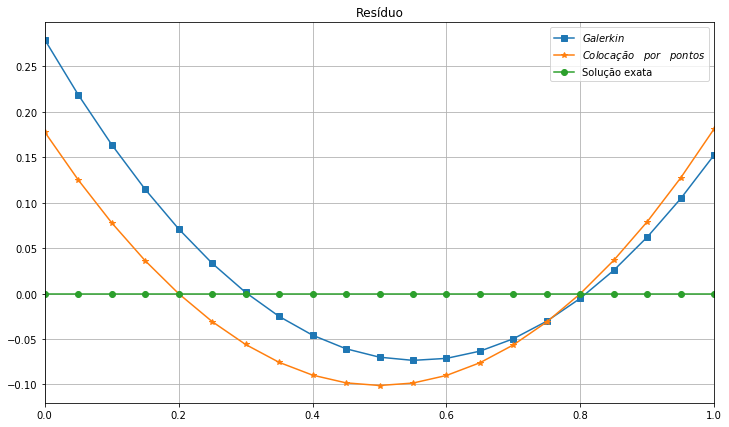

In [52]:
# PLOT 
fig, ax = plt.subplots(figsize = (12, 7))
x_range = np.arange(0.0, 1.1, 0.05)

x_2 = list()
y_1 = list()
y_2 = list()
y_3 = list()

for i in x_range:
    x_2.append(i)
    value2 = R_g.subs([(x, i)])
    y_1.append(value2)
    
    value3 = R_c.subs([(x, i)])
    y_2.append(value3)
    
    value4 = R_exat.subs([(x, i)])
    y_3.append(value4)
    
plt.plot(x_2, y_1, '-s')
plt.plot(x_2, y_2, '-*')
plt.plot(x_2, y_3, '-o')
plt.xlim([0, 1])
plt.legend(["$Galerkin$", "$Colocação \quad por\quad pontos$", "Solução exata"])
plt.title("Resíduo")
plt.grid()
plt.show()
fig.savefig('Lista01_Q8b.png',dpi=300)                              # salvar figura como png (dpi = número de pixels)